In [1]:
#implementing fastICA algorithm, using numpy

import numpy as np
from scipy.io import wavfile
from scipy import signal
from matplotlib import pyplot as plt


In [2]:
def g(x):
    #tanh(x)
    return np.tanh(x)

def g_(x):
    #g'(x)
    return 1 - g(x)*g(x)

def preprocess(x):
    #centering x:
    mean = np.mean(x, axis=1, keepdims=True)
    x_ = x - mean
    
    #whitening the centered data
    val, E = np.linalg.eigh(np.cov(x_))
    print(val)
    val = 1/np.sqrt(val)
    D = np.diag(val)
    x_ = np.dot(E, np.dot(D, np.dot(E.T, x_)))
    
    return x_, mean

In [3]:
def norm(x):
    return np.sqrt(np.sum(x ** 2))

def newW(w, x):
    w_new = (x*g(w.T.dot(x))).mean(axis=1) - w*(g_(w.T.dot(x))).mean()
    w_new = w_new/norm(w_new)
    
    return w_new

def ica(x, iter, eps=1e-16):
    x_, mean = preprocess(x)
    N = x_.shape[0] #the number of components
    
    W = np.zeros((N, N), dtype=x_.dtype)
    
    for i in range(N):
        w = np.random.rand(N)  #vector which will extract ONE particular source
        
        for j in range(iter):
            w_new = newW(w, x_)
            
            w_new -= (W[:,:i].dot((np.dot(w_new, W[:,:i])).T)).T
            w_new /= norm(w_new)
            
            dot = w_new.dot(w.T)
            
            if(np.abs(1-dot) < eps):
                w=w_new
                break
            w=w_new
        
        W[:,i] = w
    
    S = np.dot(W, x_)
    
    return S, W

In [4]:
#so this works...

!del out*
!del mix*


sampling_rate, s1 = wavfile.read('source1.wav')
sampling_rate, s2 = wavfile.read('source2.wav')

U = np.array([s1, s2])
A = [[0.5, 0.3],[0.7, 0.8]]

X = np.dot(A, U)

S, W = ica(X, iter=5000, eps=0)

#X = X - X.mean(axis=1, keepdims=True)

X = X - np.mean(X, axis=1, keepdims=True)
for i in range(X.shape[0]):
    X[i] /= np.var(X[i])
    
wavfile.write('mix1.wav', sampling_rate, X[0])
wavfile.write('mix2.wav', sampling_rate, X[1])

wavfile.write('out1.wav', sampling_rate, S[0])
wavfile.write('out2.wav', sampling_rate, S[1])

[ 15.86146816 961.92601837]


In [5]:
print(X.shape, S.shape)

(2, 50000) (2, 50000)


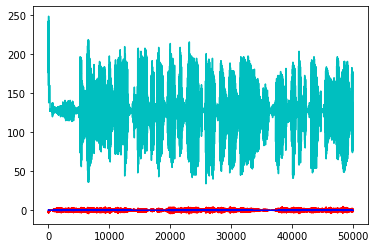

In [6]:
plt.plot(S[0], 'r')
plt.plot(U[1], 'c')
plt.plot(X[0], 'b')

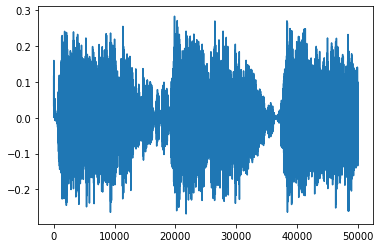

In [7]:
plt.plot(X[0])

In [8]:
A = np.array([[1.23,4.21],[6.23,1.12]])
a, m = preprocess(A)

[-4.4408921e-16  1.7496250e+01]


C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt


In [9]:
A.mean()

3.1975